In [4]:
#TO remove :
import os
directory = os.getcwd()
print(directory)

C:\Users\s1114237\OneDrive - Syngenta\Formations\Training\EPFL extension school\Machine_Learning_EPFL-extension-school\Course#3 Applied Machine Learning 1\Project_C3\Warm-Up


In [5]:
#os.chdir("Machine_Learning_EPFL-extension-school\Course#3 Applied Machine Learning 1\Project_C3\Warm-Up")
#directory = os.getcwd()
#print(directory)

In [6]:
# library 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

# Warm - up : A set of tasks 

## Task 1 : fitting a logarithmic equation

The first task consists of fitting the following logarithmic equation to a set of 50 (x,y) data points: 
y = a⋅log(x) + b

### Load and plot the data


We start by downloading the dataset for the task 1

In [133]:
# Download 
data_df1 = pd.read_csv("p3_task-1.csv")
data_df1.head()

,x,y
0,10.529,39.105
1,10.799,40.584
2,11.698,39.883
3,12.851,39.411
4,13.565,40.760


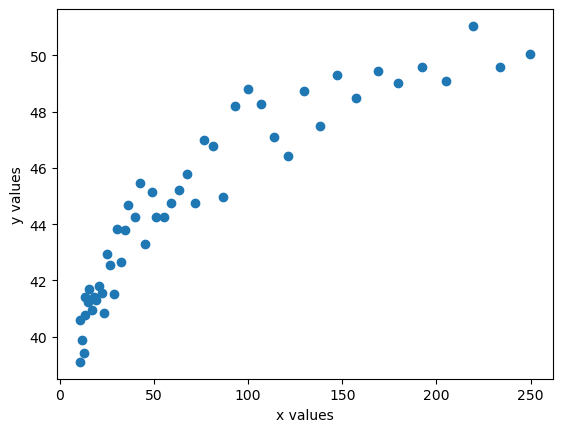

In [134]:
# Plot data points
plt.scatter(data_df1.x, data_df1.y)
plt.xlabel("x values")
plt.ylabel("y values")
plt.show()

### Define a new variable log(x) and transform the data.
We want to predict y with a linear model function of log(x). 
We have to create the log(x) variable :

In [135]:
y = data_df1.y
x = data_df1.x
x_log = np.log(data_df1.x)

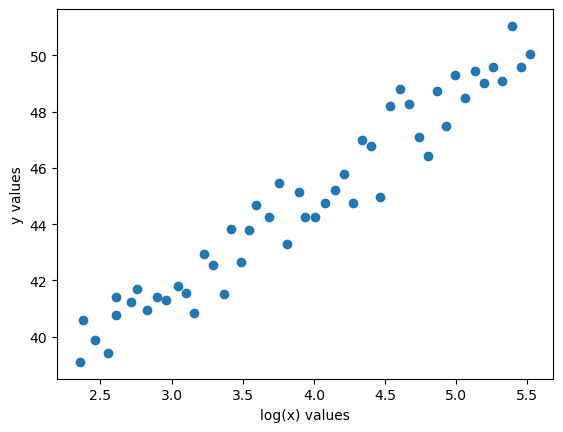

In [136]:
# Plot data points
plt.scatter(x_log , y)
plt.xlabel("log(x) values")
plt.ylabel("y values")
plt.show()

### Fit a model to the new data
y = a.log_x + b correspond to a linear regression of degree 1. to fit a model on this data we will apply the polyfit function of numpy.

In [137]:
# Fit a linear regression using all the data points
coefs = np.polyfit(x_log, y, deg=1)

In [138]:
#prediction of y values
x_values = np.linspace(min(x_log), max(x_log), num=100)
y_values = np.polyval(coefs, x_values)

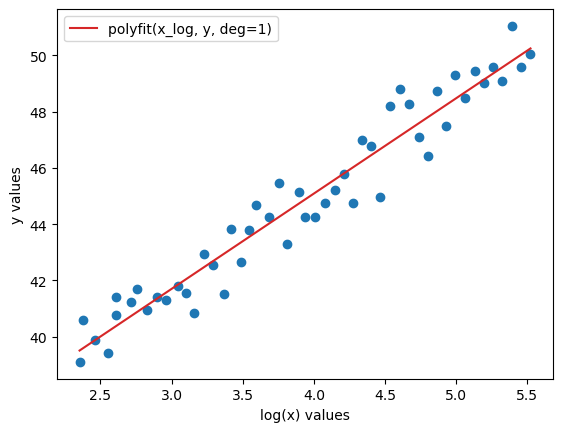

In [139]:
#Plot predicted values and observations :
plt.scatter(x_log, y)
plt.plot(x_values, y_values, c="C3", label='polyfit(x_log, y, deg=1)')
plt.xlabel("log(x) values")
plt.ylabel("y values")
plt.legend()
plt.show()

In red we show the y prediction function of log(x) obtain with a linear regression model of degree 1. 



### Plot the logarithmic curve against the original data

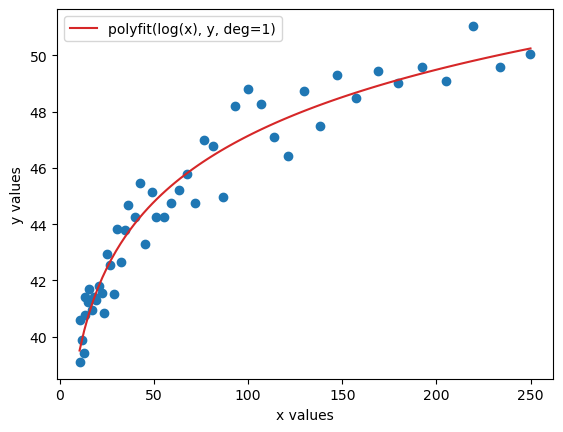

In [140]:
# Generate a hundred values between min(x) and max(x)
# Here x are not as in the previous plot the log(x)
x_values = np.linspace(x.min(), x.max(), num=100)

# Predict y values
y_values = np.polyval(coefs, np.log(x_values))

# Plot curve
plt.scatter(x, y)
plt.plot(x_values, y_values, c='C3', label='polyfit(log(x), y, deg=1)')
plt.xlabel('x values')
plt.ylabel('y values')
plt.legend()
plt.show()

### Compute the RSS and R2 measures.

In [141]:
# RSS score
def RSS(y, y_pred):
    return np.sum(np.square(np.subtract(y, y_pred)))

In [142]:
# Predict y values
y_pred = np.polyval(coefs, np.log(x))
rss = RSS(y, y_pred)
print("RSS:", rss)

RSS: 31.842651752756808


We will estimate the R2 like this :

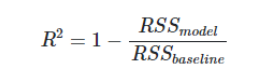

We have already compute the RSS of the model. The rss_baseline is the difference between the y observation and the average y: 

In [143]:
rss_baseline = RSS(y, y.mean())
print("RSS baseline :", rss_baseline)

RSS baseline : 541.1432872199999


In [144]:
# R^2 coefficient
R2 = 1 - (rss / rss_baseline)
print("R^2 coefficient:", R2)

R^2 coefficient: 0.9411567093138286


### Discuss the results, is it a good R2 score?
A R2 close to 1 is a good R2 it's mean that the ratio RSSmodel/RSS baseline is close to 0 and so the difference between the y_predict ans Y observed are relativly low.

## Task 2 : fitting a model with outliers

The second task consists of fitting a model to a set of data points that contains outliers.
The goal is to build 3 models and compare different approaches to handle outliers.

### Load and plot the data

In [7]:
# Download 
data_df2 = pd.read_csv("p3_task-2.csv")
data_df2.head()

,x1,x2,x3,y
0,7.892,318.818,162.970,2112.420
1,8.830,303.180,181.399,2096.231
2,13.811,296.231,145.849,2067.045
3,12.863,325.830,167.996,2269.262
4,13.698,254.035,171.892,1966.604


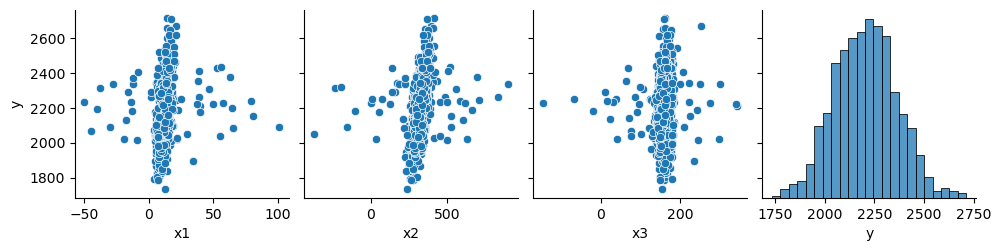

In [8]:
sns.pairplot(data = data_df2, y_vars ="y")

We saw for each predictor (x1, x2, x3) outliers. We could select them with the help of a z-score. 

### Build the set of data of the different prediction : with ¦ without outlier, test set ¦ train set.
Firstly we yill create the training set and the test set then we will filter the outliers.

#### Train set and test set
We decide to split the data set in 80-20, with a data set of 1000 observations, this means that we keep randomly 200 observations to test our model. 200 observations seems good enough to evaluate our model. One thing we want to take in consideration is that we want to evaluate all of our model with the same data set. This data set should be determine before removing outlier.

In [9]:
# Split test set :£
X = data_df2[["x1", "x2", "x3"]]
y = data_df2["y"]

# Split into train/validation sets
X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

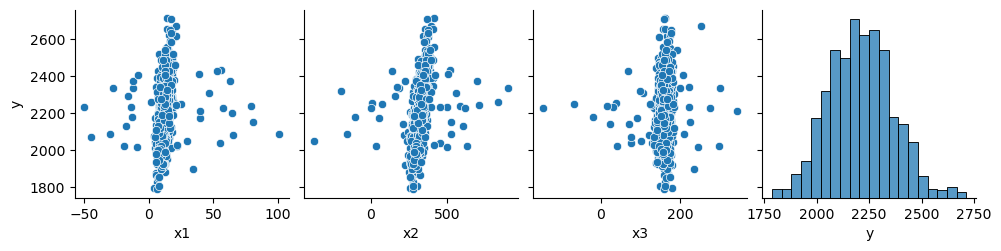

In [10]:
sns.pairplot(data = pd.concat([X_tr,y_tr], axis=1), y_vars ="y")

We have to identify outlier from the training. We will create a mask which will remove outliers from each predictor based on the z-score. And apply this mask to create a training set without outlier. 

#### Mask on Outliers

In [11]:
# z-score
def Z_score(x):
    return (x - x.mean()) / x.std()

In [12]:
# Compute z-scores
x1_z_scores = Z_score(X_tr.x1)
x2_z_scores = Z_score(X_tr.x2)
x3_z_scores = Z_score(X_tr.x3)

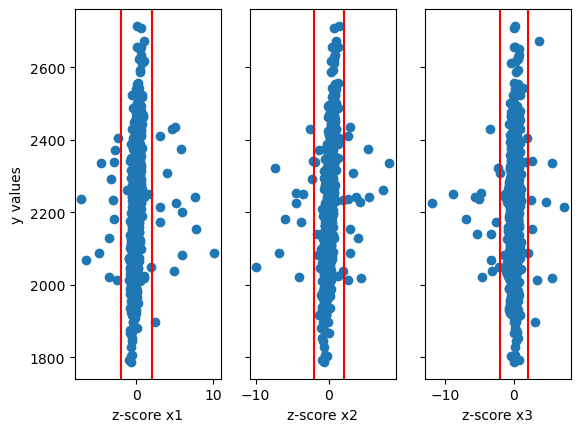

In [14]:
fig, ax = plt.subplots(1,3,sharey=True)#change size
ax[0].scatter(x1_z_scores,y_tr)
ax[1].scatter(x2_z_scores,y_tr)
ax[2].scatter(x3_z_scores,y_tr)
ax[0].set_xlabel('z-score x1')
ax[1].set_xlabel('z-score x2')
ax[2].set_xlabel('z-score x3')
ax[0].set_ylabel('y values')
ax[0].axvline(x=2, color ='r')
ax[0].axvline(x=-2, color ='r')
ax[1].axvline(x=2, color ='r')
ax[1].axvline(x=-2, color ='r')
ax[2].axvline(x=2, color ='r')
ax[2].axvline(x=-2, color ='r')

plt.show()

We saw that some points have an absolute z.score larger than 2. All this point can be considerate as outlier.
This is how we will construct our mask for the outlier.

In [15]:
mask_out = ((abs(x1_z_scores) <2) & (abs(x2_z_scores) <2)& (abs(x3_z_scores) <2))
mask_out

29     True
535    True
695    True
557    True
836    True
       ... 
106    True
270    True
860    True
435    True
102    True
Length: 800, dtype: bool

In [16]:
len(mask_out) - sum(mask_out)

40

On the training of 800 observqtion we detect around ~40 outliers on all the 3 predictors (#to do :Fix the seed to be sure to keep sames value). 

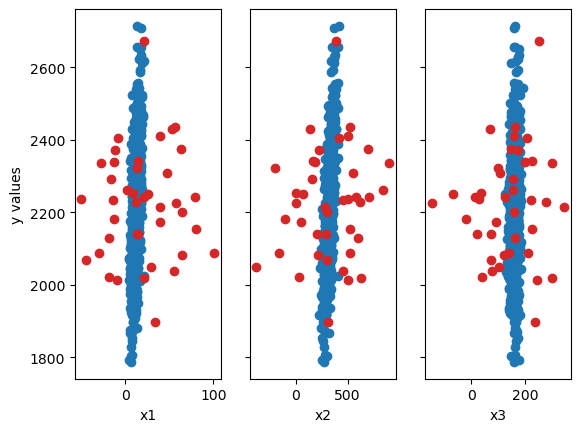

In [18]:
fig, ax = plt.subplots(1,3,sharey=True)#change size
ax[0].scatter(X_tr.x1[mask_out], y_tr[mask_out])
ax[1].scatter(X_tr.x2[mask_out], y_tr[mask_out])
ax[2].scatter(X_tr.x3[mask_out], y_tr[mask_out])
ax[0].scatter(X_tr.x1[~mask_out], y_tr[~mask_out], c="C3")
ax[1].scatter(X_tr.x2[~mask_out], y_tr[~mask_out], c="C3")
ax[2].scatter(X_tr.x3[~mask_out], y_tr[~mask_out], c="C3")
ax[0].set_xlabel('x1')
ax[1].set_xlabel('x2')
ax[2].set_xlabel('x3')
ax[0].set_ylabel('y values')


plt.show()

If we check by plotting what we consider as outlier in each predictors we saw that some outliers are shared between predictors and some are link to one of them. 

###  Models :
We will build 3 models : 
- A linear regression to the data with outliers,
- A huber regression to the data with outliers,
- A linear regression to the data without outliers.  
#### Fitting

In [19]:
# Linear regression with outliers
model_lr = LinearRegression()  

# Fit it to train data
model_lr.fit(X_tr, y_tr)#_rescaled
# Compute predictions for test set
y_lr_pred = model_lr.predict(X_val )  # set a lower limit

In [20]:
# Create a linear regression with Huber loss
lr_huber = SGDRegressor(loss="huber", penalty="none", epsilon=1, max_iter=1000, tol=1e-3)

# Fit the model
lr_huber.fit(X_tr, y_tr)
# Compute prediction line
y_huber_pred = lr_huber.predict(X_val )  

In [22]:
# Linear regression without outliers
model_lr_WO = LinearRegression()  

# Fit it to train data
model_lr_WO.fit(X_tr[mask_out] , y_tr[mask_out])
# Compute predictions for test set
y_lr_WO_pred = model_lr_WO.predict(X_val)

#### Evaluation : MAE

In [23]:
# Mean absolute error
def MAE(y, y_pred):
    return np.mean(np.abs(y - y_pred))

In [25]:
# Median baseline with outlier
mae_baseline = MAE(y_val, np.median(y_tr))

In [27]:
mae_lr = MAE(y_val, y_lr_pred)
mae_huber = MAE(y_val, y_huber_pred)
mae_lr_WO = MAE(y_val, y_lr_WO_pred)

print("MAE baseline: {:.3f}".format(mae_baseline))

print("MAE linear regression: {:.3f}".format(mae_lr))
print("MAE huber regression: {:.3f}".format(mae_huber))
print("MAE linear regression without outlier: {:.3f}".format(mae_lr_WO))

MAE baseline: 136.005
MAE linear regression: 125.868
MAE huber regression: 107.285
MAE linear regression without outlier: 107.688


Conclusion : 
1. The Huber regression is the best model. The MAE is the lowest. 
2. The Huber regression is result is really close to the linear regression result without outlier.